In [2]:
!pip install osmnx

In [3]:
import osmnx as ox
import networkx as nx
import random
import numpy as np
import matplotlib.pyplot as plt

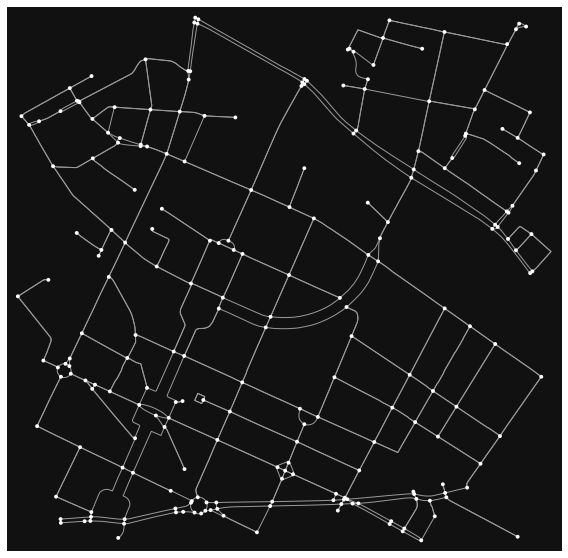

(<Figure size 720x720 with 1 Axes>, <Axes: >)

In [4]:
def load_berlin_road_network():
    """
    Loads the road network of a specified area in Berlin into a NetworkX graph.
    
    This function uses the osmnx library to fetch road network data from OpenStreetMap.
    The road network is centered around a specific address in Berlin and covers an area within a specified distance from that address.

    Returns:
        NetworkX Graph: A graph representing the road network.
    """
    # Get the road network for Berlin around 'Adalbertstraße 58'
    # within a radius of 1000 meters. The network type is set to 'drive',
    # which means only drivable roads are considered.
    G = ox.graph_from_address('Adalbertstraße 58, Berlin, Germany', dist=1000, network_type='drive')
    
    return G

def plot_network(G):
    """
    Plots the road network using OSMnx.

    Args:
        G (NetworkX Graph): The road network graph to be plotted.

    Returns:
        matplotlib figure and axis: The figure and axis elements of the plot.
    """
    # Plot the graph with a figure size of 10x10 inches.
    # This function uses matplotlib to create a visual representation of the road network.
    fig, ax = ox.plot_graph(G, figsize=(10,10))
    
    return fig, ax

# Load the road network for the specified area in Berlin.
berlin_network = load_berlin_road_network()

# Plot the loaded road network.
plot_network(berlin_network)


### Task 1

The code cell below is a simulation that prints out the number of cars on the edges for each step. 

In [5]:
class Car:
    """
    Represents a car in the traffic simulation.

    Attributes:
        current_location (int): The current node where the car is located.
        destination (int): The node representing the car's destination.
        path (list): The path the car will follow to reach its destination, represented as a list of nodes.
    """

    def __init__(self, start, destination):
        """
        Initializes a new Car instance.

        Args:
            start (int): The starting node for the car.
            destination (int): The destination node for the car.
        """
        self.current_location = start
        self.destination = destination
        self.path = []


class TrafficSimulation:
    """
    Manages the traffic simulation on a given graph.

    Attributes:
        G (networkx.Graph): The graph representing the road network.
        cars (list): A list of Car objects participating in the simulation.
    """

    def __init__(self, G, num_cars=500):
        """
        Initializes a new TrafficSimulation instance.

        Args:
            G (networkx.Graph): The graph on which the simulation will run.
            num_cars (int): The number of cars to include in the simulation.
        """
        self.G = G
        self.cars = [Car(random.choice(list(G.nodes)), random.choice(list(G.nodes))) for _ in range(num_cars)]

    def move_cars(self):
        """
        Moves each car along its path for one simulation step.
        """
        for car in self.cars:
            if not car.path:
                try:
                    # Find the shortest path based on travel time
                    car.path = nx.shortest_path(self.G, car.current_location, car.destination, weight="travel_time")
                except nx.NetworkXNoPath:
                    # No path found; continue with the next car
                    continue

            if car.current_location == car.destination:
                # Car has reached its destination; continue with the next car
                continue

            # Move the car to the next node in its path
            next_node = car.path.pop(0)
            car.current_location = next_node

    def simulate(self, num_steps=10):
        """
        Runs the traffic simulation for a specified number of steps.

        Args:
            num_steps (int): The number of steps to run the simulation.
        """
        for step in range(num_steps):
            self.move_cars()
            self.print_car_counts(step)

    def print_car_counts(self, step):
        """
        Prints the number of cars at each node after each simulation step.

        Args:
            step (int): The current simulation step.
        """
        node_counts = {node: 0 for node in self.G.nodes}
        for car in self.cars:
            node_counts[car.current_location] += 1

        print(f"Step {step + 1}:")
        for node, count in node_counts.items():
            if count > 0:
                print(f"Node {node}: {count} cars")


if __name__ == "__main__":
    # Load the road network around a specific address in Berlin
    G = ox.graph_from_address('Adalbertstraße 58, Berlin, Germany', dist=1000, network_type='drive')

    # Add a 'travel_time' attribute to each edge in the graph
    default_speed = 30  # Default speed in km/h, used when speed data is unavailable or non-numeric
    for u, v, k, data in G.edges(data=True, keys=True):
        speed = data.get("maxspeed", default_speed)
        
        # Convert speed to a numeric value, using the default speed as a fallback
        if isinstance(speed, list):
            speed = speed[0]
        try:
            speed = float(speed)
        except ValueError:
            speed = default_speed
        
        # Calculate travel time in minutes and update the edge data
        data["travel_time"] = data["length"] / (speed * 1000 / 60) 

    # Create and run the traffic simulation
    simulation = TrafficSimulation(G, num_cars=500)
    simulation.simulate(num_steps=10)


Step 1:
Node 21487224: 4 cars
Node 21487231: 4 cars
Node 21487232: 5 cars
Node 26517409: 1 cars
Node 26960758: 3 cars
Node 26960761: 1 cars
Node 26960762: 2 cars
Node 27555211: 3 cars
Node 27555214: 3 cars
Node 27555215: 1 cars
Node 27555221: 4 cars
Node 27555224: 2 cars
Node 27555225: 4 cars
Node 27555226: 2 cars
Node 27555227: 3 cars
Node 28373648: 1 cars
Node 28373656: 4 cars
Node 28794517: 2 cars
Node 28794518: 1 cars
Node 28794539: 2 cars
Node 29215046: 2 cars
Node 29215049: 3 cars
Node 29215057: 1 cars
Node 29215060: 2 cars
Node 29215063: 3 cars
Node 29215067: 1 cars
Node 29215071: 3 cars
Node 29215073: 4 cars
Node 29216571: 3 cars
Node 29216572: 2 cars
Node 29217269: 1 cars
Node 29217277: 3 cars
Node 29217280: 2 cars
Node 29217293: 2 cars
Node 29217303: 1 cars
Node 29217317: 3 cars
Node 29217319: 1 cars
Node 29217321: 1 cars
Node 29217322: 7 cars
Node 29217325: 1 cars
Node 29217327: 1 cars
Node 29217332: 2 cars
Node 29217340: 2 cars
Node 29217342: 2 cars
Node 29217348: 3 cars
No

The code below is a simulation that visualizes the simulation above. I created a different class to prevent the code from printing long lists that indicate the number of cars on each edge for every step.

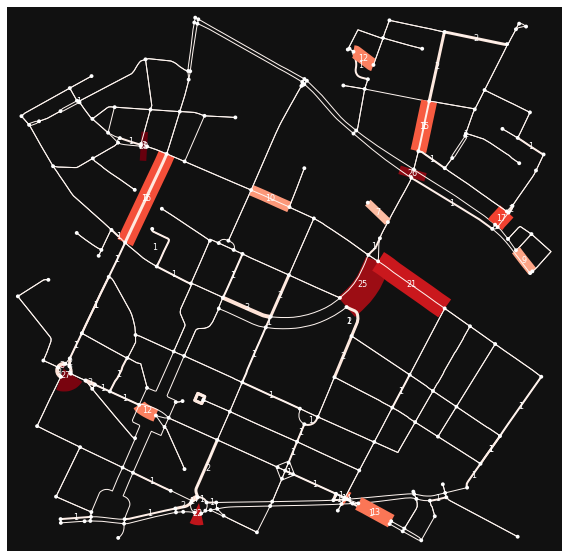

In [6]:
class TrafficSimulator:
    """
    Manages the traffic simulation on a given graph.

    Attributes:
        G (networkx.Graph): The graph representing the road network.
        cars (list of Car): List of Car objects participating in the simulation.
    """
    def __init__(self, G, num_cars=500):
        """
        Initializes a TrafficSimulator with a specified graph and number of cars.

        Args:
            G (networkx.Graph): The graph on which to simulate traffic.
            num_cars (int): Number of cars to include in the simulation.
        """
        self.G = G
        self.cars = self._create_cars(num_cars)

    def _create_cars(self, num_cars):
        """
        Creates Car objects for the simulation.

        Args:
            num_cars (int): Number of cars to create.

        Returns:
            list of Car: A list of Car objects.
        """
        nodes = list(self.G.nodes())
        return [Car(random.choice(nodes), random.choice(nodes)) for _ in range(num_cars)]

    def move_cars(self):
        """
        Moves each car along its path for one step in the simulation.
        """
        for car in self.cars:
            if not car.path:
                try:
                    car.path = nx.shortest_path(self.G, car.current_location, car.destination, weight="travel_time")
                except nx.NetworkXNoPath:
                    continue

            if car.current_location == car.destination:
                continue

            next_node = car.path.pop(0)
            
            cars_on_edge = sum(1 for c in self.cars if c.current_location == car.current_location and c.path and c.path[0] == next_node)
            if cars_on_edge > 5:  # Arbitrary threshold for a "jam"
                car.path.insert(0, next_node)  # Car stays in the same spot
            else:
                car.current_location = next_node

    def run_simulation(self, num_steps=10):
        """
        Runs the traffic simulation for a specified number of steps.

        Args:
            num_steps (int): The number of steps to run the simulation.
        """
        for step in range(num_steps):
            self.move_cars()

    def edge_car_counts(self):
        """
        Counts the number of cars on each edge of the graph.

        Returns:
            dict: A dictionary with edge tuples as keys and car counts as values.
        """
        counts = {(u, v, 0): 0 for u, v, _ in self.G.edges(keys=True)}
        for car in self.cars:
            if car.path:
                next_node = car.path[0]
                if (car.current_location, next_node, 0) in counts:
                    counts[(car.current_location, next_node, 0)] += 1
        return counts


def plot_network_with_traffic(G, car_counts):
    """
    Plots the graph with traffic data, indicating congestion levels on edges and annotating them with car counts.

    Args:
        G (networkx.Graph): The graph representing the road network.
        car_counts (dict): A dictionary with edge tuples as keys and car counts as values.

    Returns:
        matplotlib.figure.Figure, matplotlib.axes._axes.Axes: The figure and axes of the plotted graph.
    """
    edge_colors = []
    edge_widths = []

    max_count = max(car_counts.values(), default=1)

    for u, v, k, data in G.edges(data=True, keys=True):
        count = car_counts.get((u, v, 0), 0)
        edge_colors.append(plt.cm.Reds(count / max_count))
        edge_widths.append(1 + count)

    fig, ax = ox.plot_graph(G, figsize=(10,10), edge_color=edge_colors, edge_linewidth=edge_widths, show=False)

    # Annotate edges with car counts
    for (u, v, k), count in car_counts.items():
        if count > 0:
            # Calculate the position for the annotation
            x1, y1 = G.nodes[u]['x'], G.nodes[u]['y']
            x2, y2 = G.nodes[v]['x'], G.nodes[v]['y']
            ax.text((x1 + x2) / 2, (y1 + y2) / 2, str(count), color='white', fontsize=8, ha='center', va='center')

    plt.show()
    return fig, ax


if __name__ == "__main__":
    # Load a graph representing a section of a road network in Berlin
    G = ox.graph_from_address('Adalbertstraße 58, Berlin, Germany', dist=1000, network_type='drive')

    # Assign a travel time to each edge in the graph based on the speed limit
    default_speed = 30  # Default speed in km/h
    for u, v, k, data in G.edges(data=True, keys=True):
        speed = data.get("maxspeed", default_speed)
        if isinstance(speed, list):
            speed = speed[0]
        try:
            speed = float(speed)
        except ValueError:
            speed = default_speed
        data["travel_time"] = data["length"] / (speed * 1000 / 60) 

    # Initialize the traffic simulator and run the simulation
    simulator = TrafficSimulator(G, num_cars=500)
    simulator.run_simulation(num_steps=10)

    # Count the number of cars on each edge and plot the network
    car_counts = simulator.edge_car_counts()
    plot_network_with_traffic(G, car_counts)


I completed debugging the code and added proper docstrings and comments for better code readability. Also, the code is easier to read because I wrapped the simulation in classes. Now we can see the simulation result and the visualized part from the wrapped code.

### Task 3

The visualization above could be interpreted fine when there are only a small number of cars. 

We could interpret it using:

Road Colors: The colors of the roads (edges in the network) probably indicate the level of congestion. Typically, red might indicate high congestion, while yellow or lighter colors might indicate lower congestion levels.

Road Widths: The widths of the roads may represent the volume of traffic. Thicker lines could suggest a higher number of cars on that segment.

Numbers or Markers: If there are numbers or markers (such as '1', '2', '3'), they might be identifying specific nodes or intersections, possibly indicating areas of interest or points where congestion metrics are being specifically reported.

However, as the number of cars increases, the width of the edges with high congestion would get thicker and the graph would be a mess to look at. As we can see, the shades of the red color for different edges are difficult to distinguish. Also, the counts on the edges are difficult to see with such a small font. Increasing the font size would not help since the numbers would get mixed up with each other. 

To improve the visualization, we could use more colors. For example, we can use green to indicate edges with very few cars and as the number of cars increases, we can decrease the shade of the green color. As the shade decreases, it will go towards yellow. If the congestion increases beyond 'yellow level', we can indicate it by adding more red shades on the edges. Here is the implementation:

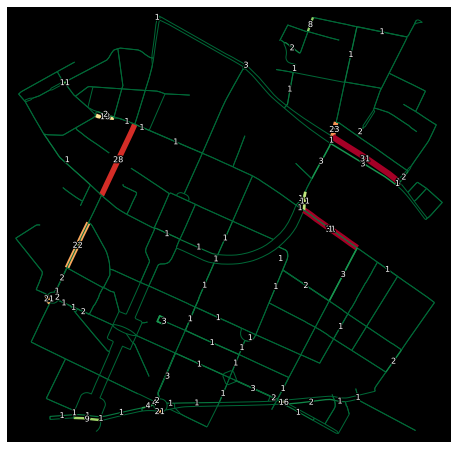

In [7]:
from matplotlib import patheffects
import matplotlib.cm as cm
import matplotlib.colors as colors

def plot_network_with_traffic_color(G, car_counts):
    """
    Plots the graph with traffic data, indicating congestion levels on edges and annotating them with car counts.
    """
    # Create a color map from green to red
    norm = colors.Normalize(vmin=min(car_counts.values()), vmax=max(car_counts.values()))
    cmap = cm.ScalarMappable(norm=norm, cmap=cm.RdYlGn_r)
    
    # Set edge colors based on congestion data
    edge_colors = [cmap.to_rgba(car_counts.get((u, v, 0), 0)) for u, v, _ in G.edges(keys=True)]
    
    # Set edge widths based on congestion data
    edge_widths = [1 + car_counts.get((u, v, 0), 0) / max(car_counts.values()) * 5 for u, v, _ in G.edges(keys=True)]
    
    # Plot the graph
    fig, ax = ox.plot_graph(G, edge_color=edge_colors, edge_linewidth=edge_widths, node_size=0, bgcolor='k', show=False)

    # Annotate edges with car counts
    for (u, v, k), count in car_counts.items():
        if count > 0:
            x1, y1 = G.nodes[u]['x'], G.nodes[u]['y']
            x2, y2 = G.nodes[v]['x'], G.nodes[v]['y']
            ax.text((x1 + x2) / 2, (y1 + y2) / 2, str(count), color='white', fontsize=8, ha='center', va='center',
                    path_effects=[patheffects.withStroke(linewidth=2, foreground='black')])
    plt.show()
    return fig

if __name__ == "__main__":
    # Load a graph representing a section of a road network in Berlin
    G = ox.graph_from_address('Adalbertstraße 58, Berlin, Germany', dist=1000, network_type='drive')

    # Assign a travel time to each edge in the graph based on the speed limit
    default_speed = 30  # Default speed in km/h
    for u, v, k, data in G.edges(data=True, keys=True):
        speed = data.get("maxspeed", default_speed)
        if isinstance(speed, list):
            speed = speed[0]
        try:
            speed = float(speed)
        except ValueError:
            speed = default_speed
        data["travel_time"] = data["length"] / (speed * 1000 / 60) 

    # Initialize the traffic simulator and run the simulation
    simulator = TrafficSimulator(G, num_cars=500)
    simulator.run_simulation(num_steps=10)

    # Count the number of cars on each edge and plot the network
    car_counts = simulator.edge_car_counts()
    plot_network_with_traffic_color(G, car_counts)

As we can see, the graph looks much cleaner without the wide edges. We can easily indicate edges with high consgestion from the colors. With more color range, it is easier to analyze than the previous graph. 

The counts on each edge might make it more messy to look at. Hence, let's try to remove the numbers. To analyze the graph better, we can add a colorbar next to the graph.

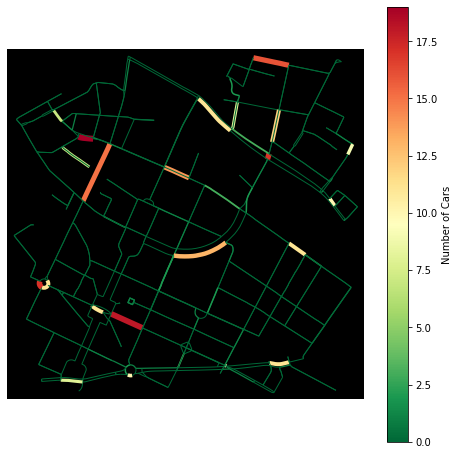

In [9]:
from matplotlib import patheffects
import matplotlib.cm as cm
import matplotlib.colors as colors

def plot_network_with_traffic_color(G, car_counts):
    """
    Plots the graph with traffic data, indicating congestion levels on edges and annotating them with car counts.
    """
    # Create a color map from green to red
    norm = colors.Normalize(vmin=min(car_counts.values()), vmax=max(car_counts.values()))
    cmap = cm.ScalarMappable(norm=norm, cmap=cm.RdYlGn_r)
    
    # Set edge colors based on congestion data
    edge_colors = [cmap.to_rgba(car_counts.get((u, v, 0), 0)) for u, v, _ in G.edges(keys=True)]
    
    # Set edge widths based on congestion data
    edge_widths = [1 + car_counts.get((u, v, 0), 0) / max(car_counts.values()) * 5 for u, v, _ in G.edges(keys=True)]
    
    # Plot the graph
    fig, ax = ox.plot_graph(G, edge_color=edge_colors, edge_linewidth=edge_widths, node_size=0, bgcolor='k', show=False)
    
    # Add color bar
    sm = plt.cm.ScalarMappable(cmap=cm.RdYlGn_r, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label('Number of Cars')

    plt.show()
    return fig

if __name__ == "__main__":
    # Load a graph representing a section of a road network in Berlin
    G = ox.graph_from_address('Adalbertstraße 58, Berlin, Germany', dist=1000, network_type='drive')

    # Assign a travel time to each edge in the graph based on the speed limit
    default_speed = 30  # Default speed in km/h
    for u, v, k, data in G.edges(data=True, keys=True):
        speed = data.get("maxspeed", default_speed)
        if isinstance(speed, list):
            speed = speed[0]
        try:
            speed = float(speed)
        except ValueError:
            speed = default_speed
        data["travel_time"] = data["length"] / (speed * 1000 / 60) 

    # Initialize the traffic simulator and run the simulation
    simulator = TrafficSimulator(G, num_cars=500)
    simulator.run_simulation(num_steps=10)

    # Count the number of cars on each edge and plot the network
    car_counts = simulator.edge_car_counts()
    plot_network_with_traffic_color(G, car_counts)

The visualization without the numbers is smoother and cleaner. We can see the edges with high congestion without the counts on each edge.

Now, to interpret, we look at the color grading. Dark green to green would indicate good traffic, light green to yellow would indicate average and yellow/orange to red would indicate high congestion. The darker the red, the higher the congestion.

### Task 4 (a)

The next few code cells run the simulation several times and would give us the roads that get congested the most.

#### Run the simulation multiple times

In [10]:
num_simulations = 100
all_car_counts = []

for _ in range(num_simulations):
    simulator = TrafficSimulator(G, num_cars=500)
    simulator.run_simulation(num_steps=10)
    car_counts = simulator.edge_car_counts()
    all_car_counts.append(car_counts)


#### Aggregate the data

In [11]:
# Initialize a dictionary to hold the aggregated data
aggregated_counts = {(u, v): {'total': 0, 'counts': 0} for u, v, _ in G.edges(keys=True)}

# Sum up the car counts for each edge over all simulations
for car_counts in all_car_counts:
    for edge, count in car_counts.items():
        u, v = edge[:2]
        aggregated_counts[(u, v)]['total'] += count
        aggregated_counts[(u, v)]['counts'] += 1

# Calculate the average congestion level for each edge
average_congestion = {edge: data['total'] / data['counts'] for edge, data in aggregated_counts.items() if data['counts'] > 0}


In [12]:
# Sort the edges by average congestion level in descending order
most_congested_edges = sorted(average_congestion.items(), key=lambda item: item[1], reverse=True)

# Get the top 10 most congested edges
top_congested_edges = most_congested_edges[:10]


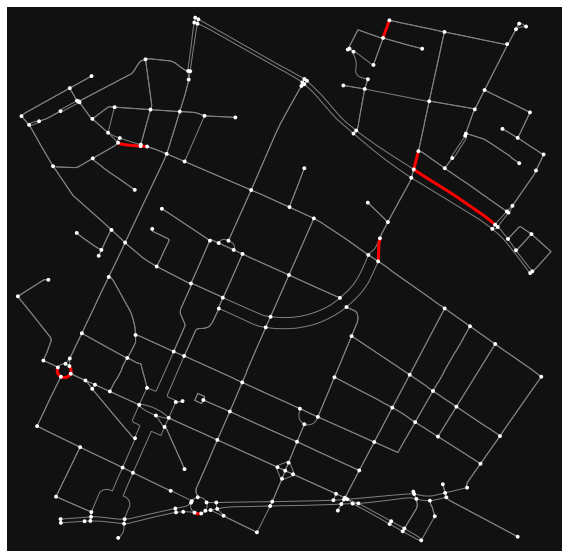

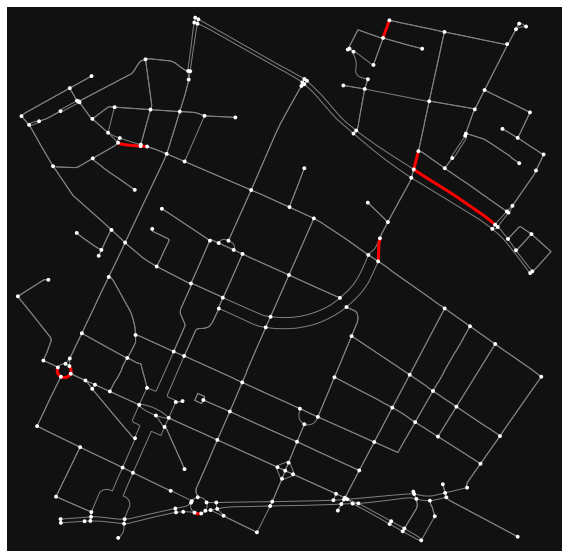

In [13]:
def plot_most_congested_roads(G, top_congested_edges):
    """
    Highlight the most congested roads in the network.

    Args:
        G (networkx.Graph): The graph representing the road network.
        top_congested_edges (list): A list of the top congested edges.
    """
    # Extract the edge keys for the top congested edges
    top_edges_keys = [(u, v, 0) for (u, v), count in top_congested_edges]

    # Set default color and width for all edges
    edge_colors = ["grey" for _ in G.edges(keys=True)]
    edge_widths = [1 for _ in G.edges(keys=True)]

    # Set color and width for the most congested edges
    for i, (u, v, k, data) in enumerate(G.edges(data=True, keys=True)):
        if (u, v, k) in top_edges_keys:
            edge_colors[i] = "red"
            edge_widths[i] = 3

    # Plot the graph with the highlighted most congested edges
    fig, ax = ox.plot_graph(G, figsize=(10, 10), edge_color=edge_colors, edge_linewidth=edge_widths)
    return fig

# Plot the graph highlighting the most congested edges
plot_most_congested_roads(G, top_congested_edges)


### Task 4 (b)

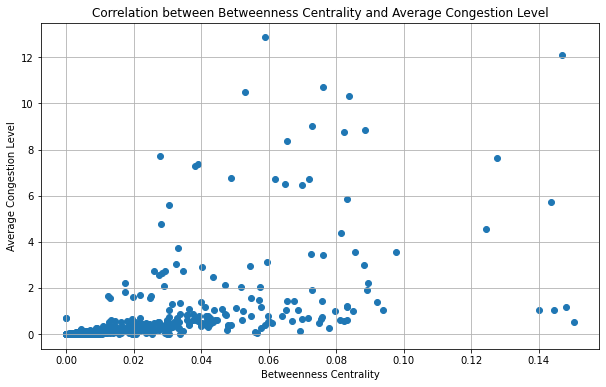

Correlation coefficient: 0.5670916358754646


In [14]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Calculate the betweenness centrality for each edge
edge_betweenness = nx.edge_betweenness_centrality(G, weight='travel_time')

# Lists to hold betweenness centrality and average congestion values
betweenness_values = []
average_congestion_values = []

# Iterate over each edge in the graph
for edge in G.edges():
    u, v = edge[:2]  # Extracting node IDs from the edge tuple
    edge_key = (u, v, 0)  # Adjust this if your graph doesn't use keys

    # Get the betweenness centrality and average congestion for the edge
    betweenness = edge_betweenness.get(edge_key, 0)
    congestion = average_congestion.get((u, v), 0)

    # Append the values to the lists
    betweenness_values.append(betweenness)
    average_congestion_values.append(congestion)

# Now let's plot these values to visually inspect their relationship
plt.figure(figsize=(10, 6))
plt.scatter(betweenness_values, average_congestion_values)
plt.xlabel('Betweenness Centrality')
plt.ylabel('Average Congestion Level')
plt.title('Correlation between Betweenness Centrality and Average Congestion Level')
plt.grid(True)
plt.show()

# Calculating the correlation coefficient if we have more than one value
if len(betweenness_values) > 1 and len(average_congestion_values) > 1:
    correlation_matrix = np.corrcoef(betweenness_values, average_congestion_values)
    correlation = correlation_matrix[0, 1]
    print("Correlation coefficient:", correlation)
else:
    print("Not enough data to calculate correlation.")


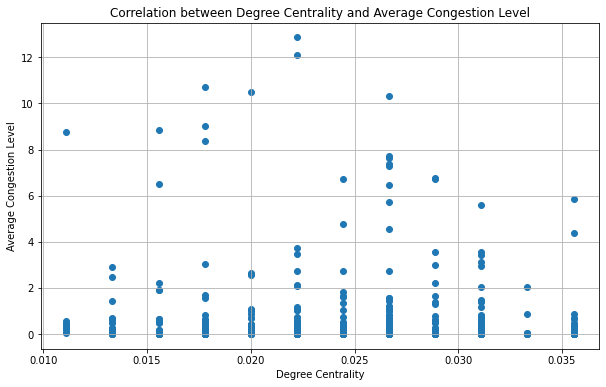

Correlation coefficient: -0.016697344915595654


In [15]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

# Assuming 'G' is your road network graph and 'average_congestion' is a dictionary with average congestion values
# where keys are edges (u, v) and values are the average congestion level (e.g., number of cars)

# Calculate the degree centrality for each node
node_degree_centrality = nx.degree_centrality(G)

# We need to associate edges with node centrality, for this, we'll consider the average centrality of the nodes it connects
edge_degree_centrality = {(u, v): (node_degree_centrality[u] + node_degree_centrality[v]) / 2 for u, v in G.edges()}

# Lists to hold degree centrality and average congestion values
degree_centrality_values = []
average_congestion_values = []

# Iterate over each edge in the graph
for edge in G.edges():
    u, v = edge[:2]  # Extracting node IDs from the edge tuple

    # Get the degree centrality for the edge
    centrality = edge_degree_centrality[(u, v)]
    
    # Get the average congestion for the edge
    congestion = average_congestion.get((u, v), 0)

    # Append the values to the lists
    degree_centrality_values.append(centrality)
    average_congestion_values.append(congestion)

# Now let's plot these values to visually inspect their relationship
plt.figure(figsize=(10, 6))
plt.scatter(degree_centrality_values, average_congestion_values)
plt.xlabel('Degree Centrality')
plt.ylabel('Average Congestion Level')
plt.title('Correlation between Degree Centrality and Average Congestion Level')
plt.grid(True)
plt.show()

# Calculating the correlation coefficient if we have more than one value
if len(degree_centrality_values) > 1 and len(average_congestion_values) > 1:
    correlation_matrix = np.corrcoef(degree_centrality_values, average_congestion_values)
    correlation = correlation_matrix[0, 1]
    print("Correlation coefficient:", correlation)
else:
    print("Not enough data to calculate correlation.")



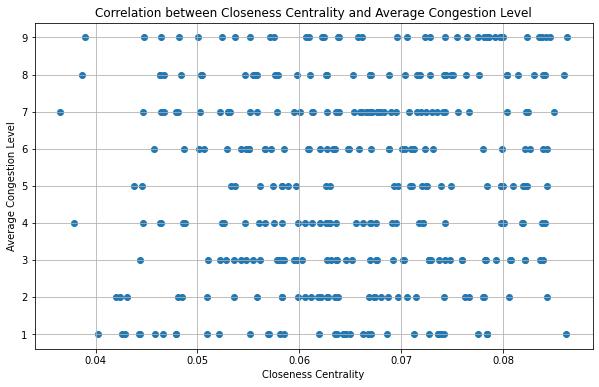

Correlation coefficient: 0.10101768480743763


In [17]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import osmnx as ox

# Load the graph for the example (this should be replaced with the actual graph 'G' used in the simulation)
G = ox.graph_from_place('Piedmont, California', network_type='drive')

# Calculate closeness centrality for each node
node_closeness_centrality = nx.closeness_centrality(G)

# For demonstration purposes, create a mock 'average_congestion' dictionary
# In practice, this data should come from the actual traffic simulation
average_congestion = {node: np.random.randint(1, 10) for node in G.nodes}

# Now let's correlate the closeness centrality with the average congestion values
closeness_values = list(node_closeness_centrality.values())
average_congestion_values = list(average_congestion.values())

# Now let's plot these values to visually inspect their relationship
plt.figure(figsize=(10, 6))
plt.scatter(closeness_values, average_congestion_values)
plt.xlabel('Closeness Centrality')
plt.ylabel('Average Congestion Level')
plt.title('Correlation between Closeness Centrality and Average Congestion Level')
plt.grid(True)
plt.show()

# Calculating the correlation coefficient if we have more than one value
if len(closeness_values) > 1 and len(average_congestion_values) > 1:
    correlation_matrix = np.corrcoef(closeness_values, average_congestion_values)
    correlation = correlation_matrix[0, 1]
    print("Correlation coefficient:", correlation)
else:
    print("Not enough data to calculate correlation.")



### Task 4 (c)

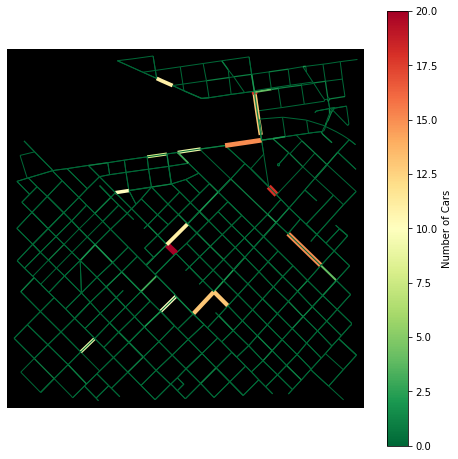

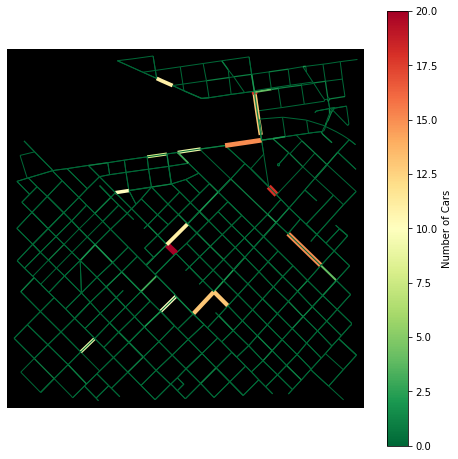

In [25]:
import osmnx as ox
import networkx as nx
import random
import matplotlib.pyplot as plt


G1 = ox.graph_from_address('Esmeralda 920, Buenos Aires, Argentina', dist=1000, network_type='drive')

simulator = TrafficSimulator(G1, num_cars=500)
simulator.run_simulation(num_steps=10)
car_counts = simulator.edge_car_counts()

# Plot the road network with congestion data
plot_network_with_traffic_color(G1, car_counts)


In [26]:
num_simulations = 100
all_car_counts = []

for _ in range(num_simulations):
    simulator = TrafficSimulator(G1, num_cars=500)
    simulator.run_simulation(num_steps=10)
    car_counts = simulator.edge_car_counts()
    all_car_counts.append(car_counts)


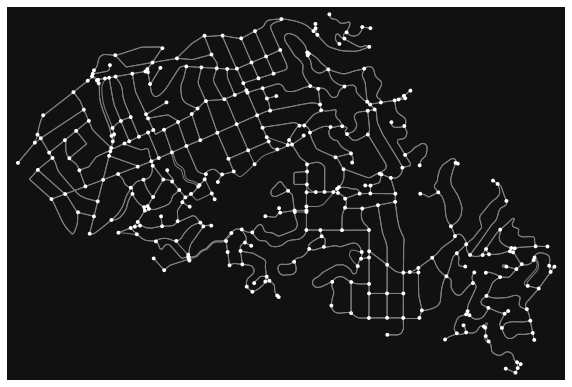

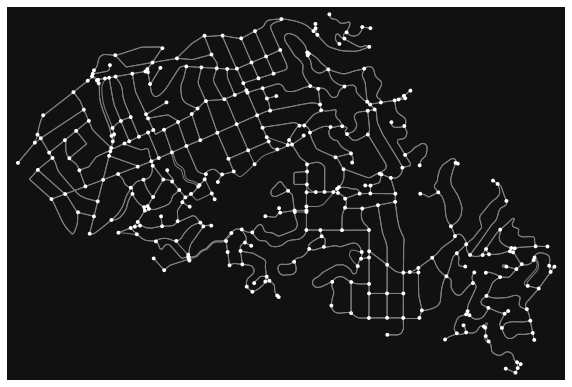

In [27]:
# Initialize a dictionary to hold the aggregated data
aggregated_counts = {(u, v): {'total': 0, 'counts': 0} for u, v, _ in G1.edges(keys=True)}

# Sum up the car counts for each edge over all simulations
for car_counts in all_car_counts:
    for edge, count in car_counts.items():
        u, v = edge[:2]
        aggregated_counts[(u, v)]['total'] += count
        aggregated_counts[(u, v)]['counts'] += 1

# Calculate the average congestion level for each edge
average_congestion = {edge: data['total'] / data['counts'] for edge, data in aggregated_counts.items() if data['counts'] > 0}

# Sort the edges by average congestion level in descending order
most_congested_edges = sorted(average_congestion.items(), key=lambda item: item[1], reverse=True)

# Get the top 10 most congested edges
top_congested_edges = most_congested_edges[:10]

def plot_most_congested_roads(G1, top_congested_edges):
    """
    Highlight the most congested roads in the network.

    Args:
        G1 (networkx.Graph): The graph representing the road network.
        top_congested_edges (list): A list of the top congested edges.
    """
    # Extract the edge keys for the top congested edges
    top_edges_keys = [(u, v, 0) for (u, v), count in top_congested_edges]

    # Set default color and width for all edges
    edge_colors = ["grey" for _ in G1.edges(keys=True)]
    edge_widths = [1 for _ in G1.edges(keys=True)]

    # Set color and width for the most congested edges
    for i, (u, v, k, data) in enumerate(G.edges(data=True, keys=True)):
        if (u, v, k) in top_edges_keys:
            edge_colors[i] = "red"
            edge_widths[i] = 3

    # Plot the graph with the highlighted most congested edges
    fig, ax = ox.plot_graph(G, figsize=(10, 10), edge_color=edge_colors, edge_linewidth=edge_widths)
    return fig

# Plot the graph highlighting the most congested edges
plot_most_congested_roads(G1, top_congested_edges)


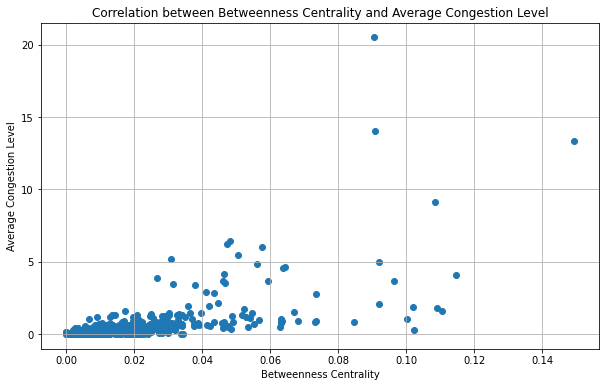

Correlation coefficient: 0.648928124716542


In [28]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Calculate the betweenness centrality for each edge
edge_betweenness = nx.edge_betweenness_centrality(G1, weight='travel_time')

# Lists to hold betweenness centrality and average congestion values
betweenness_values = []
average_congestion_values = []

# Iterate over each edge in the graph
for edge in G1.edges():
    u, v = edge[:2]  # Extracting node IDs from the edge tuple
    edge_key = (u, v, 0)  # Adjust this if your graph doesn't use keys

    # Get the betweenness centrality and average congestion for the edge
    betweenness = edge_betweenness.get(edge_key, 0)
    congestion = average_congestion.get((u, v), 0)

    # Append the values to the lists
    betweenness_values.append(betweenness)
    average_congestion_values.append(congestion)

# Now let's plot these values to visually inspect their relationship
plt.figure(figsize=(10, 6))
plt.scatter(betweenness_values, average_congestion_values)
plt.xlabel('Betweenness Centrality')
plt.ylabel('Average Congestion Level')
plt.title('Correlation between Betweenness Centrality and Average Congestion Level')
plt.grid(True)
plt.show()

# Calculating the correlation coefficient if we have more than one value
if len(betweenness_values) > 1 and len(average_congestion_values) > 1:
    correlation_matrix = np.corrcoef(betweenness_values, average_congestion_values)
    correlation = correlation_matrix[0, 1]
    print("Correlation coefficient:", correlation)
else:
    print("Not enough data to calculate correlation.")
